GOPAL RAI  (ROLL NO.-21103040)


Problem 1: Computation of Unit Hydrograph

For a catchment, the following excess rainfall hyetograph (ERH) and direct runoff 
hydrograph (DRH) are given for a 3-hour storm event. 

In [10]:
#a) Compute the area of the catchment.
import numpy as np
def Area(flow,rainfall):
  time_interval=0.5
  flow_sum = sum(flow)*time_interval*3600 #in m3
  rainfall_sum = sum(rainfall)*time_interval/1000 # in m
  return (flow_sum/rainfall_sum)/10000
rainfall = [2.5,6,8.5,0,4.5,1] 
flow = [0,12,22.5,33,42,42,35,28.5,27,29,26.5,20,13,7.5,5,3,1,0]
print('The area of catchment is: ',Area(flow,rainfall),'hectare')

The area of catchment is:  5552.0 hectare


In [11]:
#bCompute the unit hydrograph ordinates (0.5 hour interval) using least square regression. 
#What is the duration of this unit hydrograph?
import pandas as pd
N=len(flow)-2   #N value
M=len(rainfall)  #M value
nm=N-M+1
duration=0.5
P = [] 
for i in range (0,nm):
  p = np.pad(rainfall, (i, N-M-i)) #padding zeroes upside and downside on the array 
  P.append(p) 

P=np.array(P).transpose()*duration #taking transpose of the array
Data=pd.DataFrame(P) #array to Dataframe
Data

,0,1,2,3,4,5,6,7,8,9,10
0,1.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,3.00,1.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4.25,3.00,1.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,4.25,3.00,1.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2.25,0.00,4.25,3.00,1.25,0.00,0.00,0.00,0.00,0.00,0.00
5,0.50,2.25,0.00,4.25,3.00,1.25,0.00,0.00,0.00,0.00,0.00
6,0.00,0.50,2.25,0.00,4.25,3.00,1.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.50,2.25,0.00,4.25,3.00,1.25,0.00,0.00,0.00
8,0.00,0.00,0.00,0.50,2.25,0.00,4.25,3.00,1.25,0.00,0.00
9,0.00,0.00,0.00,0.00,0.50,2.25,0.00,4.25,3.00,1.25,0.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


    Time(hr)  UH_ordinate
0        0.0     0.000000
1        0.5     4.028071
2        1.0     4.916223
3        1.5     4.782593
4        2.0     3.521526
5        2.5     1.892574
6        3.0     1.348092
7        3.5     2.399644
8        4.0     3.148875
9        4.5     2.449923
10       5.0     1.150211
11       5.5     0.214295
12       6.0     0.000000
The duration of unit hydrograph is: 2.5 hours



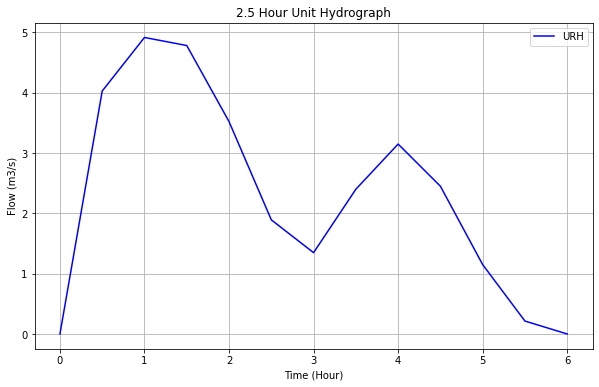

In [12]:
import matplotlib.pyplot as plt
Q=np.array(flow[1:17]).transpose() #transpose of the discharge array
PT=P.transpose()  
PT_P = PT.dot(P)  #product if P and transpose of P
PTP_inverse = np.linalg.inv(PT_P) #inverse of the (PT*P)
U = (PTP_inverse.dot(PT)).dot(Q) #product of Q matrix and inverse of the (PT*P)
U.tolist()      #array to list
df=pd.DataFrame()
df['Time(hr)']=np.arange(0,6.5,0.5)
df['UH_ordinate']=0
df['UH_ordinate'][1:12]=U
print(df)
print('The duration of unit hydrograph is:', len([x for x in rainfall if x > 0])*duration, "hours\n") #taking the length of duration where we have rainfall

plt.figure(figsize=(10,6))
plt.plot(df['Time(hr)'],df['UH_ordinate'],'b',label='URH')
plt.legend()
plt.xlabel('Time (Hour)')
plt.ylabel('Flow (m3/s)')
plt.title('2.5 Hour Unit Hydrograph')
plt.grid()
plt.show()

In [13]:
#C) Calculate a 75-min and a 90-min unit hydrograph from the one derived in (b)

In [14]:
df['1st 2.5lag']=df['UH_ordinate'].shift(5) #lagged the URH by 2.5hr
df['2nd 2.5lag']=df['1st 2.5lag'].shift(5) 
df['1st 2.5lag'][0:5]=0
df['2nd 2.5lag'][0:10]=0
df['S-Curve'] = df['UH_ordinate'] + df['1st 2.5lag'] + df['2nd 2.5lag'] #S-curve values


    time(hr)  S-Curve_ordinate  lagged S-Curve  75-min UH
0       0.00          0.000000        0.000000   0.000000
1       0.25          2.014036        0.000000   4.028071
2       0.50          4.028071        0.000000   8.056143
3       0.75          4.472147        0.000000   8.944295
4       1.00          4.916223        0.000000   9.832446
5       1.25          4.849408        0.000000   9.698816
6       1.50          4.782593        2.014036   5.537114
7       1.75          4.152059        4.028071   0.247976
8       2.00          3.521526        4.472147  -1.901242
9       2.25          2.707050        4.916223  -4.418347
10      2.50          1.892574        4.849408  -5.913669
11      2.75          3.634369        4.782593  -2.296448
12      3.00          5.376164        4.152059   2.448209
13      3.25          6.346016        3.521526   5.648979
14      3.50          7.315867        2.707050   9.217635
15      3.75          7.623668        1.892574  11.462188
16      4.00  

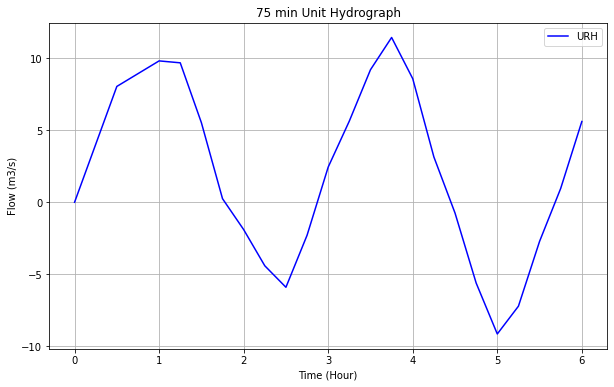

In [15]:
#75-min unit hydrograph from the one derived in (b)
df1=pd.DataFrame()
s_ordinate = (df['S-Curve'])
time = df['Time(hr)']
df1['time(hr)']=np.arange(0,6.25,0.25)
k1=[]
for k in range(len(df1)):
  if k%2==0:
   ordinate=s_ordinate[k/2]
  else:
    ordinate=np.nan
  k1.append(ordinate)
df1['S-Curve_ordinate']=k1
df2=df1.interpolate(method='linear')
df2['lagged S-Curve']=df2['S-Curve_ordinate'].shift(5) #shifting of rows of a column
df2['lagged S-Curve'][0:5]=0
df2["75-min UH"] = (df2['S-Curve_ordinate']-df2['lagged S-Curve'])*(2.5/1.25) #URH of 75-min
print(df2)
plt.figure(figsize=(10,6))
plt.plot(df2['time(hr)'],df2['75-min UH'],'b',label='URH')
plt.xlabel('Time (Hour)')
plt.ylabel('Flow (m3/s)')
plt.title('75 min Unit Hydrograph')
plt.legend()
plt.grid()
plt.show()

    time(hr)  S-Curve_ordinate  lagged S-curve  90-min UH
0       0.00          0.000000        0.000000   0.000000
1       0.25          2.014036        0.000000   3.356726
2       0.50          4.028071        0.000000   6.713452
3       0.75          4.472147        0.000000   7.453579
4       1.00          4.916223        0.000000   8.193705
5       1.25          4.849408        0.000000   8.082347
6       1.50          4.782593        0.000000   7.970988
7       1.75          4.152059        2.014036   3.563373
8       2.00          3.521526        4.028071  -0.844242
9       2.25          2.707050        4.472147  -2.941829
10      2.50          1.892574        4.916223  -5.039416
11      2.75          3.634369        4.849408  -2.025065
12      3.00          5.376164        4.782593   0.989285
13      3.25          6.346016        4.152059   3.656593
14      3.50          7.315867        3.521526   6.323902
15      3.75          7.623668        2.707050   8.194363
16      4.00  

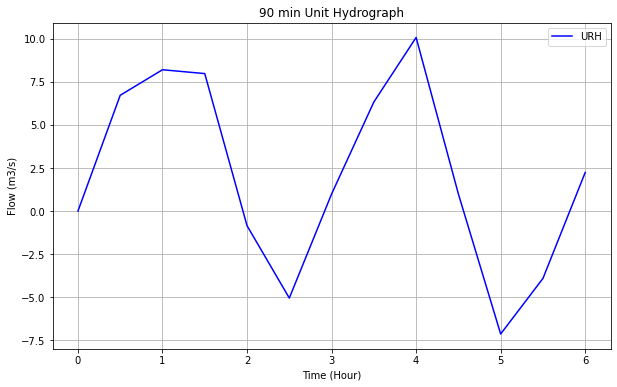

In [16]:
#90-min unit hydrograph from the one derived in (b)
df3=pd.DataFrame()
df3['time(hr)']=df2['time(hr)']
df3['S-Curve_ordinate']=df2['S-Curve_ordinate']
df3['lagged S-curve']=df3['S-Curve_ordinate'].shift(6) #for shifting the rows of a column
df3['lagged S-curve'][0:6]=0
df3["90-min UH"] = (df3['S-Curve_ordinate']-df3['lagged S-curve'])*(2.5/1.5) #URH of 90min 
print(df3)
plt.figure(figsize=(10,6))
plt.plot(df3['time(hr)'],df3['90-min UH'],'b',label='URH')
plt.xlabel('Time (Hour)')
plt.ylabel('Flow (m3/s)')
plt.title('90 min Unit Hydrograph')
plt.legend()
plt.grid()
plt.show()